- 필수과제
- KNN 회귀, 다중회귀
- 이 두 가지의 모델링을 가지고 예측 값을 비교한다.
- 예측값을 비교하고 비교는 RMSE 그외 지표들 비교해도 됩니다.
- 예측값이 나오면 잔차 비교 가능하다.
- 잔차에 대한 정규성, 등분산성, 독립성 등을 체크해서 정리하는 코드와 주석을 진행해 주세요!

- 본인만의 로직으로 변수들을 선택해서 해당 변수를 선택 후에 KNN, 다중회귀를 진행하는 것
- 예측-> 예측값을 가지고 잔차에 대한 검정, RMSE 예측값도 비교!

# KNN 회귀

In [ ]:
from sklearn.neighbors import KNeighborsRegressor     # KNN 모델
from sklearn.model_selection import train_test_split  # 데이터 나누기
from sklearn.metrics import mean_squared_error        # 에러율
from math import sqrt
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np


Mounted at /content/drive


## 데이터 불러오기

In [ ]:
boston=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Boston_house.csv')
boston.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [ ]:
# 결측값 없음
boston.isna().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

## 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
boston_sc=scaler.fit_transform(boston)
boston_sc=pd.DataFrame(boston_sc,columns=boston.columns)
boston_sc

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,-0.120013,0.441052,0.413672,-0.419782,0.140214,-1.287909,-1.075562,-0.144217,-1.459000,-0.982843,0.284830,-0.666608,-0.272599,0.159686
1,0.367166,0.441052,0.194274,-0.417339,0.557160,-0.593381,-0.492439,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,-0.101524
2,-0.265812,0.396427,1.282714,-0.417342,0.557160,-0.593381,-1.208727,-0.740262,-0.303094,-0.867883,-0.487722,-0.987329,-0.272599,1.324247
3,-0.809889,0.416163,1.016303,-0.416750,1.077737,-1.306878,-1.361517,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.182758
4,-0.511180,0.441052,1.228577,-0.412482,1.077737,-1.306878,-1.026501,-0.835284,0.113032,-0.752922,-0.487722,-1.106115,-0.272599,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.018673,0.387217,0.439316,-0.413229,-0.625796,0.115738,-0.418147,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.014454
502,0.288933,0.441052,-0.234548,-0.415249,-0.716639,0.115738,-0.500850,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.210362
503,0.797449,0.441052,0.984960,-0.413447,-0.773684,0.115738,-0.983048,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,0.148802
504,0.736996,0.403225,0.725672,-0.407764,-0.668437,0.115738,-0.865302,0.158124,1.176466,-0.982843,-0.487722,-0.803212,-0.272599,-0.057989


In [ ]:
boston_col=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']
boston1=boston_sc.loc[:,boston_col]

In [ ]:
target=boston_sc.loc[:,['Target']]
target

,Target
0,0.159686
1,-0.101524
2,1.324247
3,1.182758
4,1.487503
...,...
501,-0.014454
502,-0.210362
503,0.148802
504,-0.057989


## 변수 선택
- 상관계수 확인
- 다중공선성 확인

<Axes: >

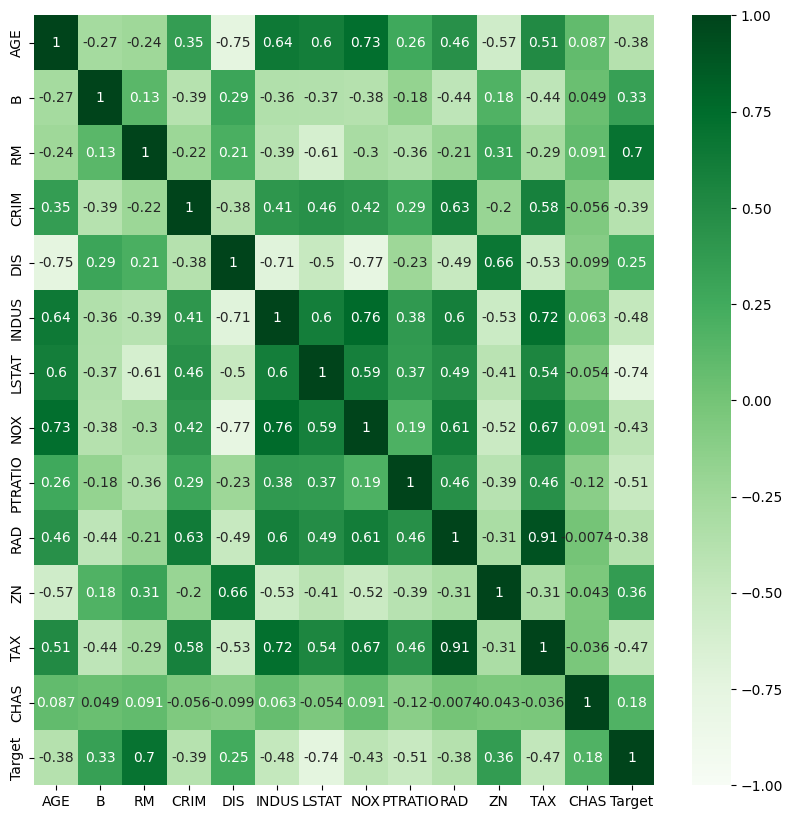

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

boston_sc.corr(method='pearson')

plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(boston.corr(), annot=True,cmap='Greens',vmin=-1,vmax=1)

In [ ]:
boston_sc_allcol=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']
boston_sc_all=boston_sc.loc[:,boston_sc_allcol]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vlf_all=pd.DataFrame()
vlf_all['VIF factor']=[variance_inflation_factor(boston_sc1, i) for i in range(boston_sc_all.shape[1])]    # boston_sp1의 열 개수만큼
vlf_all['features']=boston_sc_all.columns
vlf_all=vlf_all.sort_values('VIF factor').reset_index(drop=True)
vlf_all

,VIF factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


- vif 값이 10 이상일 경우 높다고 판단하지만, 스케일링 후 모든 변수가 10 이하임
- 상관분석 상으로 서로가 서로에게 관계되어있는 변수 삭제
- (1)TAX-RAD, (2)AGE-DIS, (3)DIS-NOX, (4)INDUS-NOX

In [ ]:
boston_sccol1=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','ZN', 'CHAS']
boston_sc1=boston_sc.loc[:,boston_sccol1]

In [ ]:
vlf_1=pd.DataFrame()
vlf_1['VIF factor']=[variance_inflation_factor(boston_sc1, i) for i in range(boston_sc1.shape[1])]    # boston_sp1의 열 개수만큼
vlf_1['features']=boston_sc1.columns
vlf_1=vlf_1.sort_values('VIF factor').reset_index(drop=True)
vlf_1

,VIF factor,features
0,1.057805,CHAS
1,1.316559,B
2,1.478206,CRIM
3,1.496077,PTRATIO
4,1.872532,RM
5,2.154483,ZN
6,2.936487,LSTAT
7,3.075755,AGE
8,3.179166,INDUS
9,3.901348,NOX


In [ ]:
boston_sccol2=['B', 'RM', 'CRIM','INDUS', 'LSTAT', 'NOX', 'PTRATIO','ZN', 'CHAS']
boston_sc2=boston_sc.loc[:,boston_sccol2]

In [ ]:
vlf_2=pd.DataFrame()
vlf_2['VIF factor']=[variance_inflation_factor(boston_sc2, i) for i in range(boston_sc2.shape[1])]    # boston_sp1의 열 개수만큼
vlf_2['features']=boston_sc2.columns
vlf_2=vlf_2.sort_values('VIF factor').reset_index(drop=True)
vlf_2

,VIF factor,features
0,1.054403,CHAS
1,1.305822,B
2,1.453493,CRIM
3,1.479227,PTRATIO
4,1.625401,ZN
5,1.724337,RM
6,2.587019,LSTAT
7,2.997163,INDUS
8,3.054907,NOX


In [ ]:
boston_sccol3=['B', 'RM', 'CRIM','INDUS', 'LSTAT', 'PTRATIO','ZN', 'CHAS']
boston_sc3=boston_sc.loc[:,boston_sccol3]

In [ ]:
vlf_3=pd.DataFrame()
vlf_3['VIF factor']=[variance_inflation_factor(boston_sc3, i) for i in range(boston_sc3.shape[1])]    # boston_sp1의 열 개수만큼
vlf_3['features']=boston_sc3.columns
vlf_3=vlf_3.sort_values('VIF factor').reset_index(drop=True)
vlf_3

,VIF factor,features
0,1.049900,CHAS
1,1.289789,B
2,1.362578,PTRATIO
3,1.422533,CRIM
4,1.515914,ZN
5,1.709432,RM
6,2.024734,INDUS
7,2.442263,LSTAT


In [ ]:
boston_sccol4=['B', 'RM', 'CRIM', 'LSTAT', 'PTRATIO','ZN', 'CHAS']
boston_sc4=boston_sc.loc[:,boston_sccol4]

In [ ]:
vlf_4=pd.DataFrame()
vlf_4['VIF factor']=[variance_inflation_factor(boston_sc4, i) for i in range(boston_sc4.shape[1])]    # boston_sp1의 열 개수만큼
vlf_4['features']=boston_sc4.columns
vlf_4=vlf_4.sort_values('VIF factor').reset_index(drop=True)
vlf_4     # 수치가 크게 나아지지 않음

,VIF factor,features
0,1.032262,CHAS
1,1.260567,B
2,1.328166,ZN
3,1.348461,PTRATIO
4,1.392746,CRIM
5,1.707908,RM
6,2.214012,LSTAT


## 선택된 변수로 모델 피팅

### 변수 제거 x

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(boston1,target,test_size=0.2)

In [ ]:
rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), ' / 가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 0.3958738189485484
RMSE value k 2 = 0.3529973841882894
RMSE value k 3 = 0.3141685404446035
RMSE value k 4 = 0.32329562327701655
RMSE value k 5 = 0.32116003527675574
RMSE value k 6 = 0.32851717616243986
RMSE value k 7 = 0.32642077994697055
RMSE value k 8 = 0.33390109770077414
RMSE value k 9 = 0.33484924989087045
RMSE value k 10 = 0.3368599899556945
RMSE value k 11 = 0.346413151878999
RMSE value k 12 = 0.3501605694777968
RMSE value k 13 = 0.3529587053561498
RMSE value k 14 = 0.3577322435198518
RMSE value k 15 = 0.35778793968378025
RMSE value k 16 = 0.3614337576920848
RMSE value k 17 = 0.36205263550178846
RMSE value k 18 = 0.36577734933926176
RMSE value k 19 = 0.3683594038053231
RMSE value k 20 = 0.3748000408028258
가장최소 rmse 0.3141685404446035  / 가장 최소 k 3


### (1)변수 제거

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(boston_sc1,target,test_size=0.2)

rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), ' / 가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 0.47655845091512994
RMSE value k 2 = 0.43161508792696157
RMSE value k 3 = 0.4545760852142252
RMSE value k 4 = 0.4054948013602154
RMSE value k 5 = 0.43410915324926147
RMSE value k 6 = 0.4438096542232504
RMSE value k 7 = 0.46686748391746696
RMSE value k 8 = 0.4728759231420327
RMSE value k 9 = 0.48568363404943676
RMSE value k 10 = 0.4914542127308349
RMSE value k 11 = 0.49604882127838396
RMSE value k 12 = 0.49495961792530435
RMSE value k 13 = 0.5036326124827041
RMSE value k 14 = 0.5126562722507013
RMSE value k 15 = 0.5183850388922641
RMSE value k 16 = 0.5233165017982374
RMSE value k 17 = 0.5288514903083528
RMSE value k 18 = 0.5279463066441237
RMSE value k 19 = 0.5285287906544415
RMSE value k 20 = 0.5365347709541023
가장최소 rmse 0.4054948013602154  / 가장 최소 k 4


### (2)변수 제거

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(boston_sc2,target,test_size=0.2)

rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), ' / 가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 0.6538113291704009
RMSE value k 2 = 0.5413528460829382
RMSE value k 3 = 0.5085268754559463
RMSE value k 4 = 0.4947627201395179
RMSE value k 5 = 0.48371550860205614
RMSE value k 6 = 0.4767250100526116
RMSE value k 7 = 0.4834969188218923
RMSE value k 8 = 0.4651682149940212
RMSE value k 9 = 0.4732462012454455
RMSE value k 10 = 0.4786369388055547
RMSE value k 11 = 0.4857783689909718
RMSE value k 12 = 0.48659147960521504
RMSE value k 13 = 0.49163104203911867
RMSE value k 14 = 0.493923847652207
RMSE value k 15 = 0.5005914046847177
RMSE value k 16 = 0.502561265978865
RMSE value k 17 = 0.5049831516917347
RMSE value k 18 = 0.5069103530863613
RMSE value k 19 = 0.5101021701245775
RMSE value k 20 = 0.5151581645942048
가장최소 rmse 0.4651682149940212  / 가장 최소 k 8


###(3)변수 제거

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(boston_sc3,target,test_size=0.2)

rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), ' / 가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 0.629107683004558
RMSE value k 2 = 0.5838336391573316
RMSE value k 3 = 0.5885487417324567
RMSE value k 4 = 0.5949923989605098
RMSE value k 5 = 0.5965342910960024
RMSE value k 6 = 0.6103221935524988
RMSE value k 7 = 0.6116757335527003
RMSE value k 8 = 0.6139962718277907
RMSE value k 9 = 0.6105868148624629
RMSE value k 10 = 0.6163636510618812
RMSE value k 11 = 0.6168548455046139
RMSE value k 12 = 0.6184426480455777
RMSE value k 13 = 0.6221268315214127
RMSE value k 14 = 0.6258482397475581
RMSE value k 15 = 0.6279530919572293
RMSE value k 16 = 0.6284065349805871
RMSE value k 17 = 0.6318446219134097
RMSE value k 18 = 0.631505792458587
RMSE value k 19 = 0.6305887243330335
RMSE value k 20 = 0.6308942280391632
가장최소 rmse 0.5838336391573316  / 가장 최소 k 2


###(4)변수 제거

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(boston_sc4,target,test_size=0.2)

rmse_val =[]
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance')     # 가중평균
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val), ' / 가장 최소 k', rmse_val.index(min(rmse_val))+1)

RMSE value k 1 = 0.4953928230027001
RMSE value k 2 = 0.435987476602101
RMSE value k 3 = 0.43126024493511933
RMSE value k 4 = 0.4506118503707117
RMSE value k 5 = 0.44508820613431443
RMSE value k 6 = 0.43134059504850836
RMSE value k 7 = 0.412148045793874
RMSE value k 8 = 0.40095195012316875
RMSE value k 9 = 0.3938292584510909
RMSE value k 10 = 0.3856359015784347
RMSE value k 11 = 0.3805463384332343
RMSE value k 12 = 0.3820461528576598
RMSE value k 13 = 0.38113446909244086
RMSE value k 14 = 0.39349128317468063
RMSE value k 15 = 0.39621404726588044
RMSE value k 16 = 0.4010947091088653
RMSE value k 17 = 0.4058244412310504
RMSE value k 18 = 0.4109396970340453
RMSE value k 19 = 0.41290442881726896
RMSE value k 20 = 0.42123119541498083
가장최소 rmse 0.3805463384332343  / 가장 최소 k 11


<Axes: >

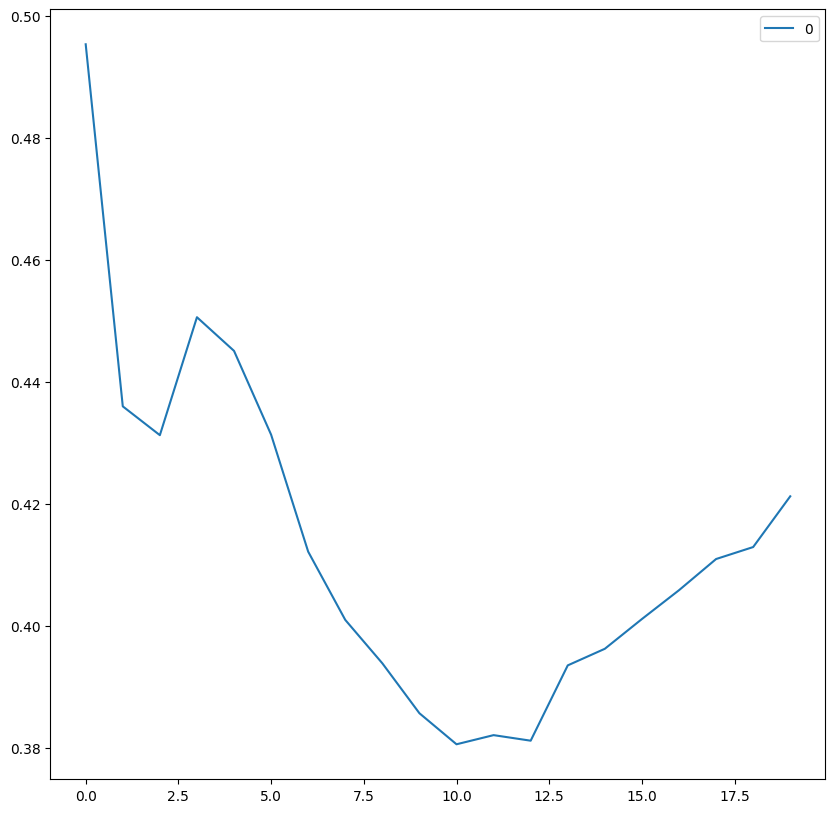

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

- 다중공선성을 줄였을 때, rmse 값도 좋아지는 것은 아니다
- 변수를 하나도 없애지 않았을 때와 (4)변수제거를 했을 때의 rmse 값이 낮다.

##결론
1. 다중공선성이 줄었다고 rmse 값도 줄어드는 것은 아니다.
2. 변수를 하나도 없애지 않았을 때와 (4)변수제거를 했을 때의 rmse 값이 낮다.

# 다중선형회귀

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

## 변수 선택 (p-value)

### 변수 삭제X

In [ ]:
model=sm.OLS.from_formula('Target~'+'+'.join(boston_sc_allcol),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        05:19:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###(1)변수 삭제

In [ ]:
model=sm.OLS.from_formula('Target~'+'+'.join(boston_sc1),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          2.00e-132
Time:                        05:20:38   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2107      4.893      5.970      0.000      19.597      38.825
AGE           -0.0043      0.013     -0.320      0.749      -0.031       0.022
B              0.0082      0.003      3.032      0.003       0.003       0.014
RM             4.1343      0.419      9.859      0.000       3.310       4.958
CRIM          -0.0614      0.030     -2.019      0.044      -0.121      -0.002
DIS           -1.4889      0.203     -7.322      0.000      -1.888      -1.089
INDUS         -0.0458      0.056     -0.819      0.413      -0.156       0.064
LSTAT         -0.5158      0.052     -9.983      0.000      -0.617      -0.414
NOX          -14.5948      3.670     -3.977      0.000     -21.806      -7.384
PTRATIO       -0.8113      0.122     -6.669      0.000      -1.050      -0.572
ZN             0.0415      0.014      3.064      0.002       0.015       0.068
CHAS           3.0850      0.872      3.538      0.000       1.372       4.798
==============================================================================
Omnibus:                      193.860   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.429
Skew:                           1.628   Prob(JB):                    7.58e-209
Kurtosis:                       8.904   Cond. No.                     9.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###(2)변수 삭제

In [ ]:
model=sm.OLS.from_formula('Target~'+'+'.join(boston_sc2),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          7.35e-123
Time:                        05:20:51   Log-Likelihood:                -1537.4
No. Observations:                 506   AIC:                             3095.
Df Residuals:                     496   BIC:                             3137.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9190      4.682      2.973      0.003       4.721      23.117
B              0.0091      0.003      3.204      0.001       0.004       0.015
RM             4.7516      0.424     11.201      0.000       3.918       5.585
CRIM          -0.0325      0.032     -1.022      0.307      -0.095       0.030
INDUS          0.0552      0.057      0.964      0.335      -0.057       0.168
LSTAT         -0.4966      0.051     -9.713      0.000      -0.597      -0.396
NOX           -4.0905      3.424     -1.195      0.233     -10.817       2.636
PTRATIO       -0.8989      0.128     -7.049      0.000      -1.149      -0.648
ZN            -0.0070      0.012     -0.560      0.576      -0.031       0.017
CHAS           3.2907      0.918      3.586      0.000       1.488       5.094
==============================================================================
Omnibus:                      217.251   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.735
Skew:                           1.806   Prob(JB):                    9.26e-268
Kurtosis:                       9.729   Cond. No.                     8.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###(3)변수 삭제

In [ ]:
model=sm.OLS.from_formula('Target~'+'+'.join(boston_sc3),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     142.9
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          1.21e-123
Time:                        05:21:09   Log-Likelihood:                -1538.1
No. Observations:                 506   AIC:                             3094.
Df Residuals:                     497   BIC:                             3132.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6207      4.270      2.721      0.007       3.231      20.010
B              0.0095      0.003      3.355      0.001       0.004       0.015
RM             4.7045      0.423     11.133      0.000       3.874       5.535
CRIM          -0.0381      0.031     -1.209      0.227      -0.100       0.024
INDUS          0.0163      0.047      0.345      0.730      -0.076       0.109
LSTAT         -0.5110      0.050    -10.284      0.000      -0.609      -0.413
PTRATIO       -0.8561      0.122     -6.992      0.000      -1.097      -0.616
ZN            -0.0031      0.012     -0.259      0.796      -0.027       0.020
CHAS           3.2190      0.916      3.514      0.000       1.419       5.019
==============================================================================
Omnibus:                      212.224   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1173.006
Skew:                           1.765   Prob(JB):                    1.93e-255
Kurtosis:                       9.570   Cond. No.                     6.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###(4)변수 삭제

In [ ]:
model=sm.OLS.from_formula('Target~'+'+'.join(boston_sc4),data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          9.66e-125
Time:                        05:21:23   Log-Likelihood:                -1538.2
No. Observations:                 506   AIC:                             3092.
Df Residuals:                     498   BIC:                             3126.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7437      4.251      2.762      0.006       3.391      20.096
B              0.0093      0.003      3.345      0.001       0.004       0.015
RM             4.7001      0.422     11.138      0.000       3.871       5.529
CRIM          -0.0365      0.031     -1.172      0.242      -0.098       0.025
LSTAT         -0.5058      0.047    -10.699      0.000      -0.599      -0.413
PTRATIO       -0.8518      0.122     -6.999      0.000      -1.091      -0.613
ZN            -0.0046      0.011     -0.407      0.684      -0.027       0.017
CHAS           3.2600      0.908      3.592      0.000       1.477       5.043
==============================================================================
Omnibus:                      214.236   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1199.801
Skew:                           1.780   Prob(JB):                    2.93e-261
Kurtosis:                       9.651   Cond. No.                     6.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value 값이 높은 AGE, INDUS를 삭제
- 그 다음 변수는 p-value만 봐서는 잘 모르겠음
- 하지만 변수 삭제 2,3,4는 R-squared 값이 더 안좋아지고 있으므로 AGE, INDUS만 삭제하는 것이 좋다고 판단됨

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


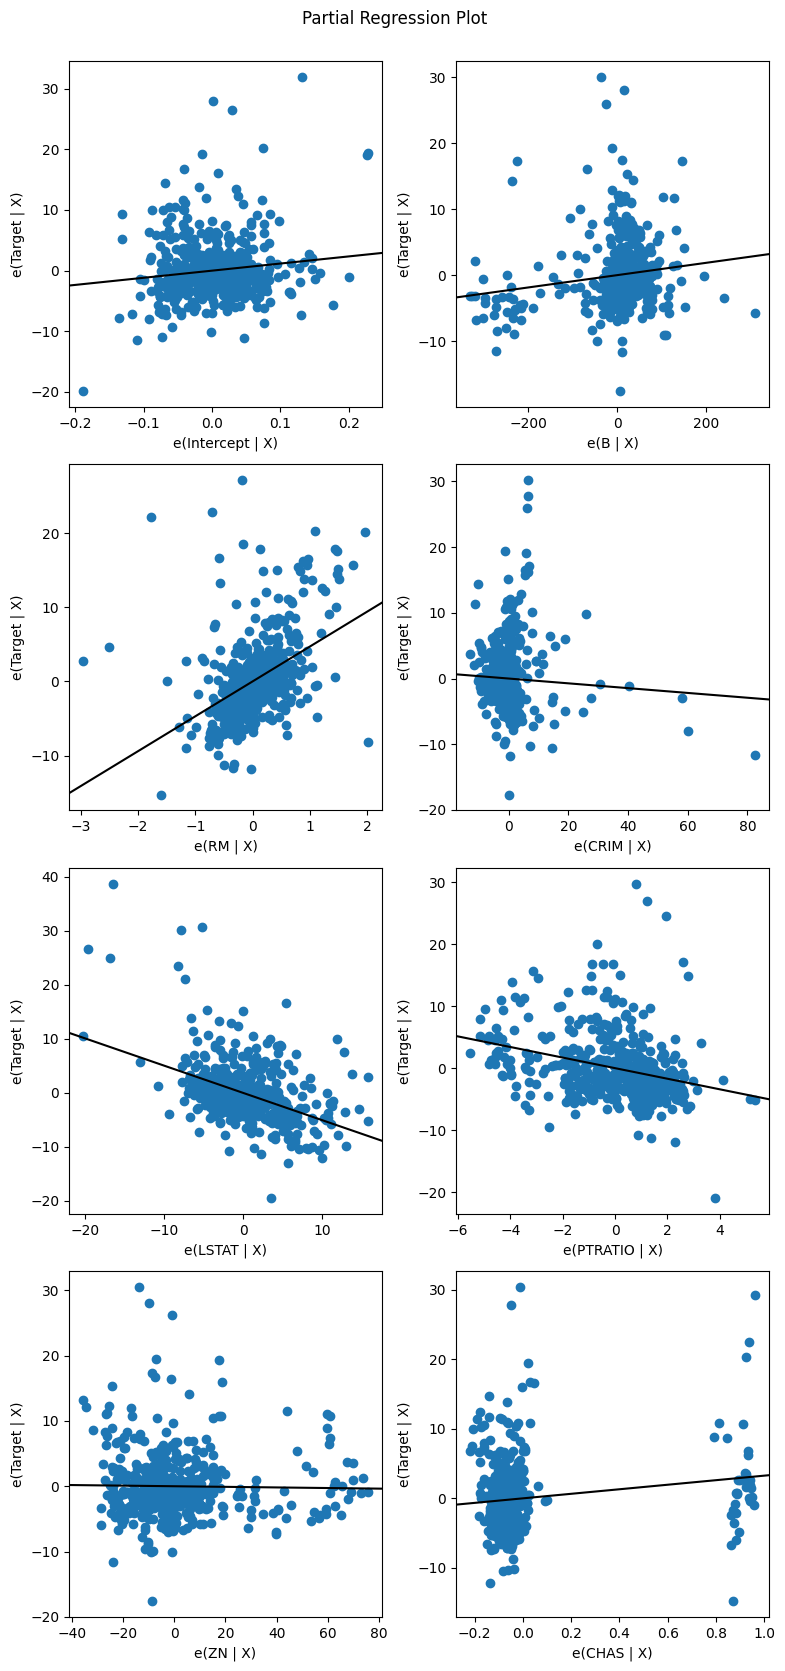

In [ ]:
# CCPR Plot 개별 변수의 추정 회귀계수를 표현하는 Plot
# sm에서 제공
fig=plt.figure(figsize=(8,17))
sm.graphics.plot_partregress_grid(res,fig=fig)
plt.show()

# 전체 로직
**데이터 불러오기 -> 결측값 확인 -> 스케일링 -> 변수 선택(상관계수, 다중공선성, p-value) -> 모델 피팅 -> 그래프 확인**